#Выгрузка и сортировка данных

Перед тем как анализировать данные, мы произвели рассчет FV в эксель

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_excel("НИС (1).xlsx") # Загрузим таблицу из Excel файла в датафрейм
df = df.set_index(df.columns[0])
df # Печатаем датафрейм

,Instrument 1,Instrument 2,Instrument 3,Instrument 4,Instrument 5,Instrument 6,Instrument 7,Instrument 8,Instrument 9,Instrument 10,Instrument 11,Instrument 12,Instrument 13,Instrument 14,Instrument 15,Instrument 16,Instrument 17,Instrument 18,Instrument 19,Instrument 20
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
PV of all instruments,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.00
r,21.00,12.00,25.00,10.00,23.00,15.00,10.00,14.00,12.00,20.00,10.00,21.00,15.00,12.00,24.00,14.00,11.00,25.0,19.00,13.00
Term (years),9.00,5.00,3.00,8.00,6.00,6.00,5.00,7.00,4.00,5.00,7.00,6.00,10.00,3.00,9.00,6.00,15.00,6.0,4.00,9.00
FV,5559.92,1762.34,1953.13,2143.59,3462.83,2313.06,1610.51,2502.27,1573.52,2488.32,1948.72,3138.43,4045.56,1404.93,6930.99,2194.97,4784.59,3814.7,2005.34,3004.04


Отсортируем результат

In [ ]:
sorted_df = df.sort_values(by = 'FV', axis = 1, ascending = False) # Сортируем в порядке убывания
sorted_df

,Instrument 15,Instrument 1,Instrument 17,Instrument 13,Instrument 18,Instrument 5,Instrument 12,Instrument 20,Instrument 8,Instrument 10,Instrument 6,Instrument 16,Instrument 4,Instrument 19,Instrument 3,Instrument 11,Instrument 2,Instrument 7,Instrument 9,Instrument 14
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
PV of all instruments,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
r,24.00,21.00,11.00,15.00,25.0,23.00,21.00,13.00,14.00,20.00,15.00,14.00,10.00,19.00,25.00,10.00,12.00,10.00,12.00,12.00
Term (years),9.00,9.00,15.00,10.00,6.0,6.00,6.00,9.00,7.00,5.00,6.00,6.00,8.00,4.00,3.00,7.00,5.00,5.00,4.00,3.00
FV,6930.99,5559.92,4784.59,4045.56,3814.7,3462.83,3138.43,3004.04,2502.27,2488.32,2313.06,2194.97,2143.59,2005.34,1953.13,1948.72,1762.34,1610.51,1573.52,1404.93


Проведем разведочный анализ данных: построим несколько граффиков,определим выбросы и предложим способы борьбы с ними

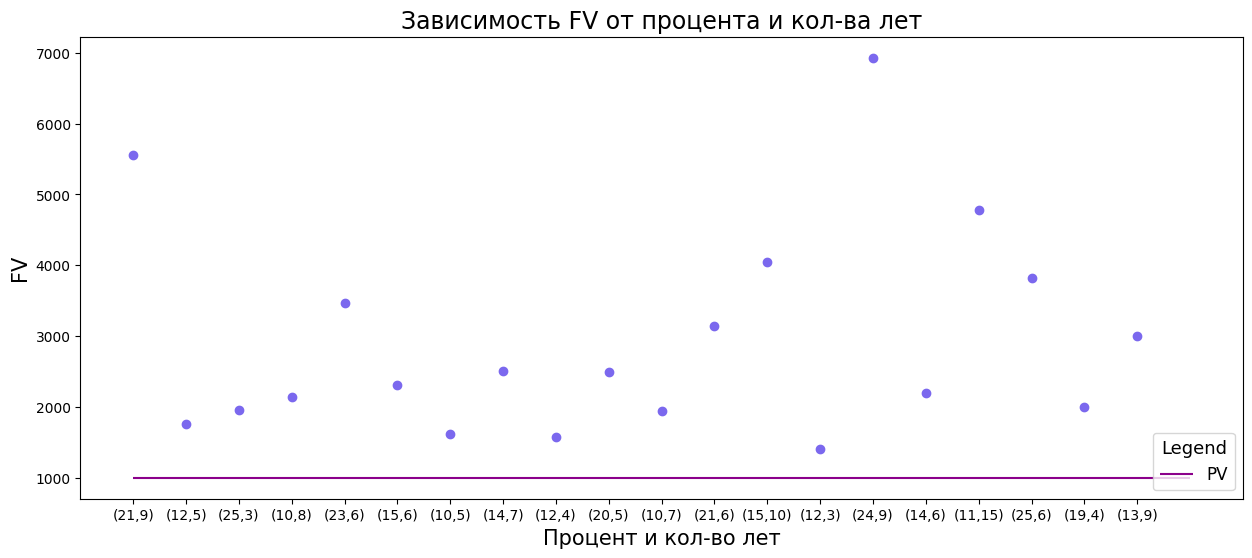

In [ ]:
plt.figure(figsize = (15, 6))

r=[21,12,25,10,23,15,10,14,12,20,10,21,15,12,24,14,11,25,19,13]
year=[9,5,3,8,6,6,5,7,4,5,7,6,10,3,9,6,15,6,4,9]
X=[]
for i in range(len(r)):
  X.append("("+str(r[i])+","+str(year[i])+")")#объединяем пары процент,год
x=X
y = np.array([5559.917313, 1762.341683, 1953.125, 2143.58881, 3462.825992, 2313.060766, 1610.51, 2502.268791, 1573.51936, 2488.32, 1948.7171, 3138.428377, 4045.557736, 1404.928, 6930.988312, 2194.972624, 4784.589488, 3814.697266, 2005.33921,3004.041938])
plt.scatter(x, y, color='mediumslateblue')#наносим точки на график
y=1000
plt.hlines(y,0,20,color='darkmagenta',label='PV')#проводим линию на уровне 1000
plt.title('Зависимость FV от процента и кол-ва лет', fontsize=17)#подписываем оси
plt.xlabel('Процент и кол-во лет', fontsize=15)
plt.ylabel('FV', fontsize=15)
plt.legend(title='Legend', title_fontsize=13, fontsize=12, ncol=2, loc='lower right')
plt.show()



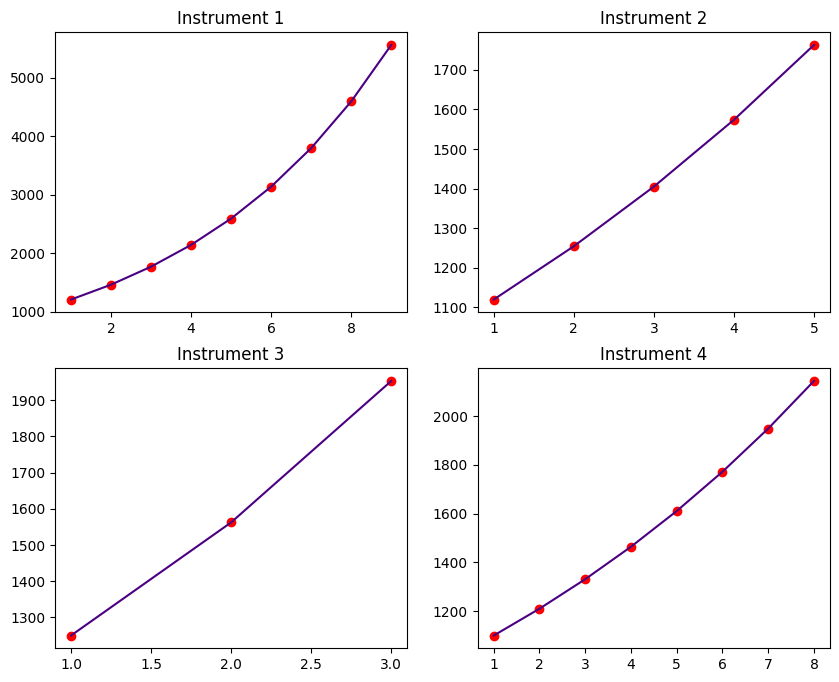

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
df = pd.read_excel("annual_report.xlsx")#загрузим таблицу из Excel файла в датафрейм
df
plt.subplot(2, 2, 1)#указываем место графика
plt.title('Instrument 1')#подписываем график
plt.plot(df['Year'].values, df['Instrument 1'].values,c='indigo')#строим графики на основе соответствующих столбцов из датасета
plt.scatter(df['Year'].values, df['Instrument 1'].values,c='r')
plt.subplot(2, 2, 2)
plt.title('Instrument 2')
plt.plot(df['Year'].values, df['Instrument 2'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 2'].values,c='r')
plt.subplot(2, 2, 3)
plt.title('Instrument 3')
plt.plot(df['Year'].values, df['Instrument 3'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 3'].values,c='r')
plt.subplot(2, 2, 4)
plt.title('Instrument 4')
plt.plot(df['Year'].values, df['Instrument 4'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 4'].values,c='r')

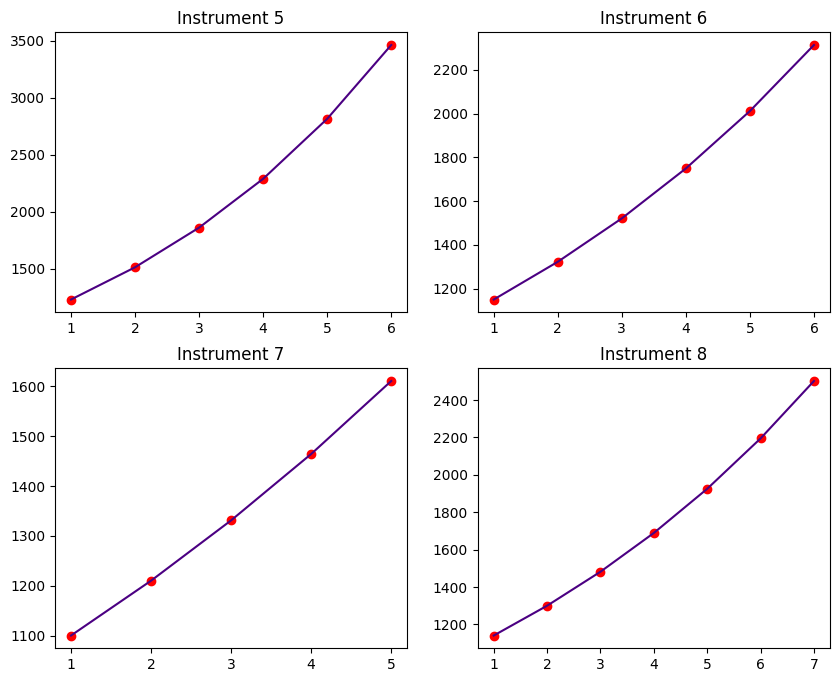

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title('Instrument 5')
plt.plot(df['Year'].values, df['Instrument 5'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 5'].values,c='r')
plt.subplot(2, 2, 2)
plt.title('Instrument 6')
plt.plot(df['Year'].values, df['Instrument 6'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 6'].values,c='r')
plt.subplot(2, 2, 3)
plt.title('Instrument 7')
plt.plot(df['Year'].values, df['Instrument 7'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 7'].values,c='r')
plt.subplot(2, 2, 4)
plt.title('Instrument 8')
plt.plot(df['Year'].values, df['Instrument 8'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 8'].values,c='r')

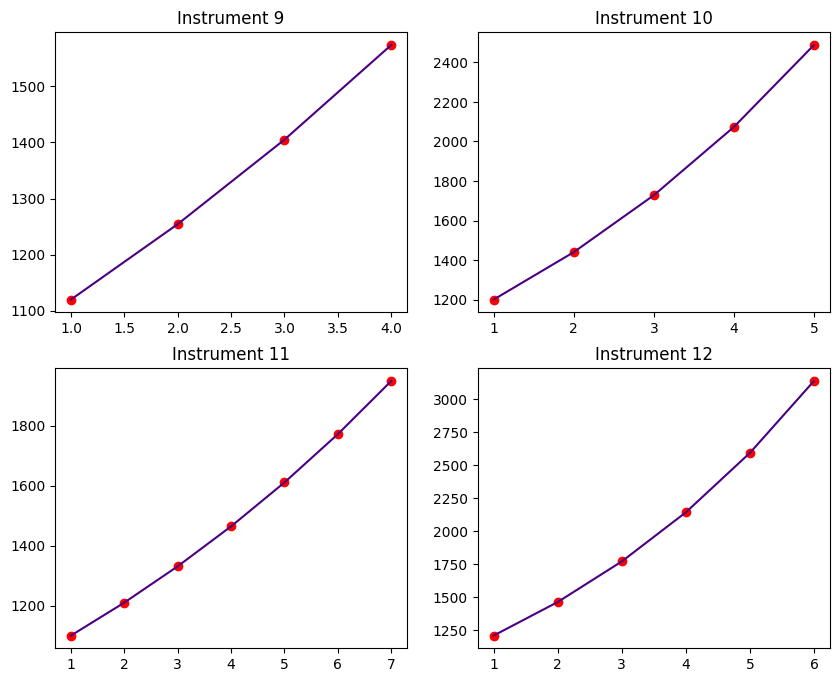

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title('Instrument 9')
plt.plot(df['Year'].values, df['Instrument 9'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 9'].values,c='r')
plt.subplot(2, 2, 2)
plt.title('Instrument 10')
plt.plot(df['Year'].values, df['Instrument 10'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 10'].values,c='r')
plt.subplot(2, 2, 3)
plt.title('Instrument 11')
plt.plot(df['Year'].values, df['Instrument 11'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 11'].values,c='r')
plt.subplot(2, 2, 4)
plt.title('Instrument 12')
plt.plot(df['Year'].values, df['Instrument 12'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 12'].values,c='r')

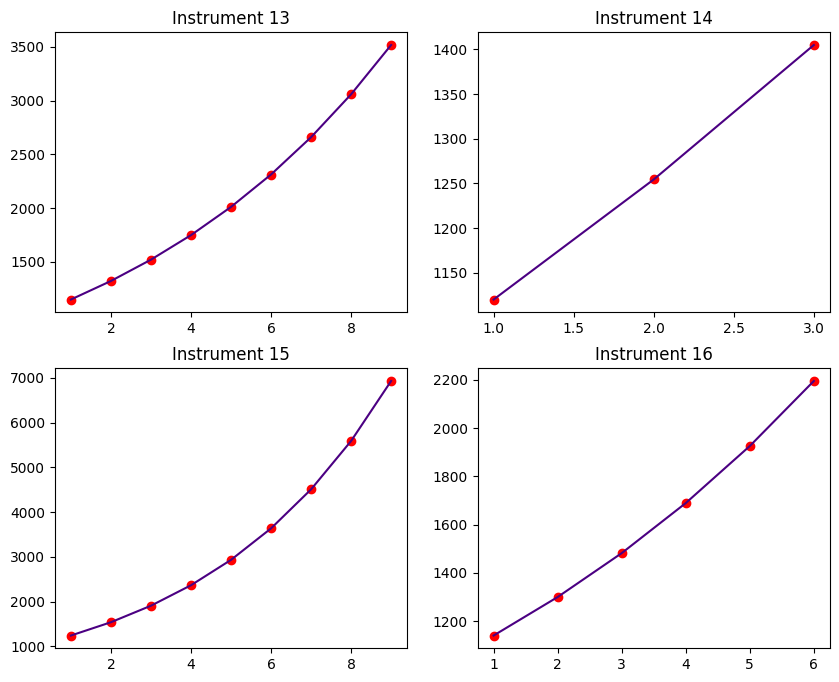

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title('Instrument 13')
plt.plot(df['Year'].values, df['Instrument 13'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 13'].values,c='r')
plt.subplot(2, 2, 2)
plt.title('Instrument 14')
plt.plot(df['Year'].values, df['Instrument 14'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 14'].values,c='r')
plt.subplot(2, 2, 3)
plt.title('Instrument 15')
plt.plot(df['Year'].values, df['Instrument 15'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 15'].values,c='r')
plt.subplot(2, 2, 4)
plt.title('Instrument 16')
plt.plot(df['Year'].values, df['Instrument 16'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 16'].values,c='r')

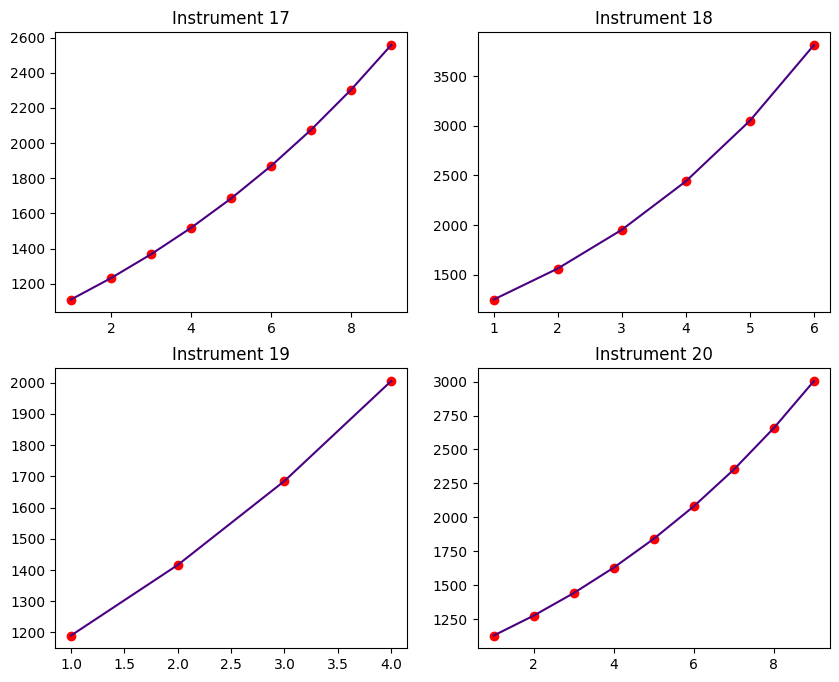

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title('Instrument 17')
plt.plot(df['Year'].values, df['Instrument 17'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 17'].values,c='r')
plt.subplot(2, 2, 2)
plt.title('Instrument 18')
plt.plot(df['Year'].values, df['Instrument 18'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 18'].values,c='r')
plt.subplot(2, 2, 3)
plt.title('Instrument 19')
plt.plot(df['Year'].values, df['Instrument 19'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 19'].values,c='r')
plt.subplot(2, 2, 4)
plt.title('Instrument 20')
plt.plot(df['Year'].values, df['Instrument 20'].values,c='indigo')
plt.scatter(df['Year'].values, df['Instrument 20'].values,c='r')

# Выбросы

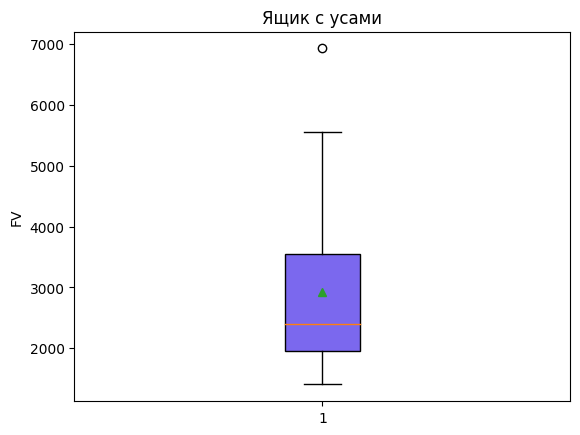

In [ ]:
data=[5559.917313, 1762.341683, 1953.125, 2143.58881, 3462.825992, 2313.060766, 1610.51, 2502.268791, 1573.51936, 2488.32, 1948.7171, 3138.428377, 4045.557736, 1404.928, 6930.988312, 2194.972624, 4784.589488, 3814.697266, 2005.33921,3004.041938]

box=plt.boxplot(data,patch_artist=True,showmeans=True)#строим график
colors = ['mediumslateblue']

for patch, color in zip(box['boxes'], colors):#меняем цвет заливки
    patch.set_facecolor(color)
plt.ylabel('FV')
plt.title('Ящик с усами')
plt.show()


На графике видно, что значение 6930, которому соответствует инструмент 15, выбивается из общей выборки. Для решения этой проблемы, предлагаем заменить его параметры на параметры инструмента с значением ближайшим FV, то есть первого инструмента. Тогда для пятнадцатого инструмента year = 3, r = 21 и FV = 5559.917313. Посмотрим теперь на новый график "Ящик с усами 2".

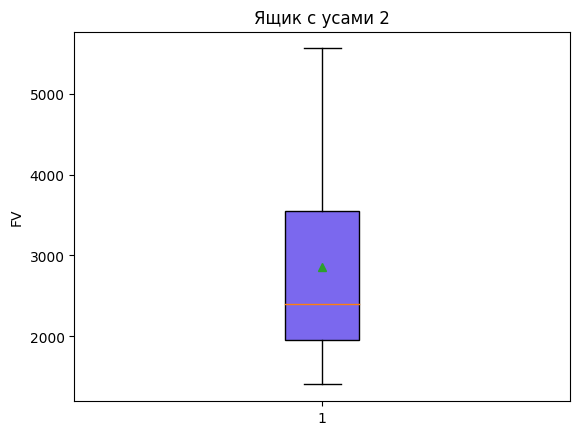

In [ ]:
data=[5559.917313, 1762.341683, 1953.125, 2143.58881, 3462.825992, 2313.060766, 1610.51, 2502.268791, 1573.51936, 2488.32, 1948.7171, 3138.428377, 4045.557736, 1404.928, 5559.917313, 2194.972624, 4784.589488, 3814.697266, 2005.33921,3004.041938]

box=plt.boxplot(data,patch_artist=True,showmeans=True)
colors = ['mediumslateblue']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel('FV')
plt.title('Ящик с усами 2')
plt.show()

Нам удалось устранить выброс